In [7]:
import numpy as np
from matplotlib import pyplot as plt
import astropy.units as u

In [8]:
# Get the points and weights for Gauss-Laguerre quadrature:
p, w = np.polynomial.laguerre.laggauss(100)

# Calculate the four coefficients from Bian et al 2016 relative to their Spitzer values
# using Gauss-Laguerre quadrature
def calc_conductivities(R = 0.0, a = 0.0):
    kappa = (1/30.) * np.sum(w * np.exp(p-p**2.0) * p**(9.0) * (p**2.0 - 2.5) / (R*p**(4.0-a)+1))
    alpha = (1/12.) * np.sum(w * np.exp(p-p**2.0) * p**(9.0) / (R*p**(4.0-a)+1))
    beta = (2/9.) * np.sum(w * np.exp(p-p**2.0) * p**(7.0) * (p**2.0 - 2.5) / (R*p**(4.0-a)+1))
    sigma = (1/3.) * np.sum(w * np.exp(p-p**2.0) * p**(7.0) / (R*p**(4.0-a)+1))
    return kappa, alpha, beta, sigma


In [9]:
# Check the R=0 case (should be 1)
k, a, b, s = calc_conductivities()
print(k, a, b, s)

1.000000011613824 0.9999999984764291 0.9999999961204157 0.9999999998900371


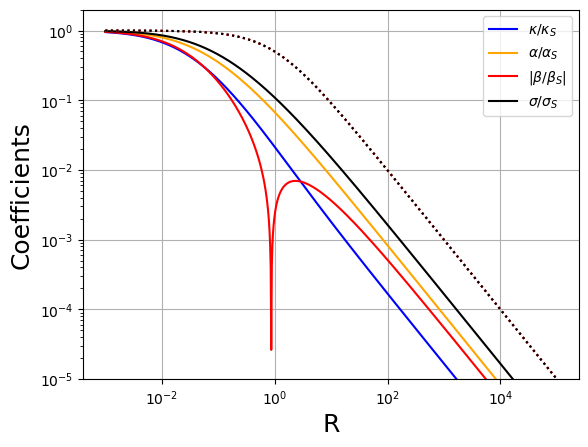

In [17]:
# R from 10^-3 to 10^5 
R = 10.0**np.arange(-3,5,0.01)

# calculate kappa, alpha, beta, sigma for two values of the exponent alpha
k0 = np.zeros(len(R))
a0 = np.zeros(len(R))
b0 = np.zeros(len(R))
s0 = np.zeros(len(R))
k1 = np.zeros(len(R))
a1 = np.zeros(len(R))
b1 = np.zeros(len(R))
s1 = np.zeros(len(R))

for i in range(len(R)):
    k0[i], a0[i], b0[i], s0[i] = calc_conductivities(R=R[i], )
    k1[i], a1[i], b1[i], s1[i] = calc_conductivities(R=R[i], a=4.0)


# plot them.
plt.plot(R, k0, color='blue', label=r'$\kappa/\kappa_{S}$')
plt.plot(R, a0, color='orange', label=r'$\alpha / \alpha_{S}$')
plt.plot(R, np.abs(b0), color='red', label=r'|$\beta / \beta_{S}$|')
plt.plot(R, s0, color='black', label=r'$\sigma / \sigma_{S}$')

plt.plot(R, k1, color='blue', linestyle=':')
plt.plot(R, a1, color='orange', linestyle=':')
plt.plot(R, np.abs(b1), color='red', linestyle=':')
plt.plot(R, s1, color='black', linestyle=':')

#plt.plot(R, 1/(1+R), color='green')

plt.legend()
plt.xlabel('R', fontsize=18)
plt.ylabel('Coefficients', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-5,2)
plt.grid('-')
plt.savefig('/Users/jreep/Desktop/tmp/conductivities.png', dpi=200)